## Exemplo: Predição com regressão linear 

Autora: Profa. Rosana Rego 


### Passo 01: Importar as bibliotecas necessárias 

In [1]:
import utils                    
import numpy as np #Para trabalhar com arrays
import matplotlib.pyplot as plt #Para plotar os gráficos
from sklearn.linear_model import LinearRegression #Para importar o modelo de regressão linear
from sklearn.model_selection import train_test_split #Para dividir o dataset em treino e teste

### Passo 02: Gerar/Abrir o *dataset* que será utilizado

In [2]:
# Gerando o dataset sintético
df = utils.generate_synthetic_data(duration_cycle=5, start_day=25, year=2021, start_month_index=1, number_of_cycle = 20, period_duration = 30)
# Preparando os dados para o modelo de regressão linear/machine learning
periods_data = utils.calculate_datatime(df)
features, labels = utils.generate_final_features(df)

### Passo 03: Dividir o dataset em conjuntos para treino e teste do modelo

In [3]:
x_train, x_test, y_train, y_test  = train_test_split(features, labels, test_size=0.5, random_state=0) 
# Redefinindo os dados para o modelo de regressão linear/machine learning
train_y=np.array(y_train)
train_x= np.array(x_train)
test_x= np.array(x_test)
test_y= np.array(y_test)
train_x = train_x.reshape((train_x.shape[0],train_x.shape[1]*train_x.shape[2]))
train_y = train_y.reshape((train_y.shape[0],train_y.shape[1]*1))
test_x = test_x.reshape((test_x.shape[0],test_x.shape[1]*test_x.shape[2]))
test_y = test_y.reshape((test_y.shape[0],test_y.shape[1]*1))

### Passo 04: Introduzir os dados no modelo 

In [4]:
# Modelo de regressão linear
model_LR= LinearRegression()
model_LR.fit(train_x, train_y)
# Fazer a predição
y_pred = model_LR.predict(test_x)
output_pred = [[int(round(i[0])), int(round(i[1]))] for i in y_pred] # round the values 
print(output_pred)

[[30, 5], [30, 5], [30, 5], [30, 5], [30, 5], [30, 5], [30, 5], [30, 5], [30, 5]]


### Passo 05: Visualizando os resultados

In [15]:
cycle_length=[]
periods=[]
for i in range(len(output_pred)):
    cycle_length.append(output_pred[i][0] )
    periods.append(output_pred[i][1] )

Text(0.5, 1.0, 'Duração dos ciclos e variação dos periodos')

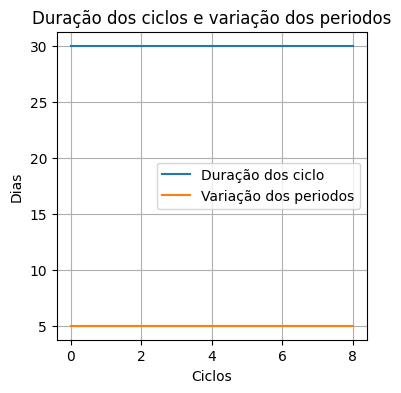

In [34]:
plt.figure(figsize=(4,4))
plt.plot(cycle_length)
plt.plot(periods)
plt.legend(['Duração dos ciclo', 'Variação dos periodos'])
plt.grid()
plt.xlabel('Ciclos')
plt.ylabel('Dias')
plt.title('Duração dos ciclos e variação dos periodos')